In [1302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# cleaning

In [1696]:
protein_one = pd.read_csv('/Users/jonathanfarro/Desktop/animal-protein-consumption.csv')

life_ex = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/life-expectancy-hmd-unwpp.csv')

usa_pricing = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/average_prices_for_food.csv')

daily_cals = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv')

fruit_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/fruit-consumption-per-capita.csv')

veg_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/vegetable-consumption-per-capita/vegetable-consumption-per-capita.csv' )

nutrition =  pd.read_excel('/Users/jonathanfarro/Desktop/ Capstone Files/food_comp.xlsx')

protein_per_GDP = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-per-capita-protein-supply-vs-gdp-per-capita.csv')

death = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/death-rate-by-cause-who-mdb.csv')



In [1697]:
# rename columns to something easier to work with 

protein = protein_one.rename(columns={
                        protein_one.columns[3]:'fish',
                        protein_one.columns[4]:'poultry',
                        protein_one.columns[5]:'pork',
                        protein_one.columns[6]:'beef',
                        protein_one.columns[7]:'sheep/goat',
                        protein_one.columns[8]:'other',
                        protein_one.columns[9]:'eggs',
                        protein_one.columns[10]:'milk'
                       })

In [1698]:
# bulk clean up 
protein = protein.rename(columns=lambda x: x.lower())
protein = protein.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)

life_ex = life_ex.rename(columns = lambda x: x.lower())
life_ex = life_ex.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
life_ex = life_ex.rename(columns = {life_ex.columns[3] : 'life_expectancy(0)'})

protein_per_GDP = protein_per_GDP.rename(columns = lambda x: x.lower())
protein_per_GDP = protein_per_GDP.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
gdp_population = protein_per_GDP.drop(columns= {protein_per_GDP.columns[3],protein_per_GDP.columns[6]})
gdp_population = gdp_population.rename(columns = { gdp_population.columns[3]: 'gdp_per_capita'}) 


daily_cals = daily_cals.rename(columns = lambda x: x.lower())
daily_cals = daily_cals.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

death = death.rename(columns = lambda x: x.lower())
death = death.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

nutrition = nutrition.rename(columns = lambda x: x.lower())
nutrition = nutrition.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)


In [1702]:
# creating a new column to show total_protein intake for a day.
protein['total_protein'] = protein.iloc[:, 3:11].sum(axis = 1).round(2)

In [1704]:
fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)

In [1706]:
capstone = pd.merge(protein,
         life_ex,
         on= ['entity','code','year'],
         how= 'inner')

capstone.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,life_expectancy(0)
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43,33.2910
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37,33.7565
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09,34.2008
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22,34.6726
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82,35.1245


In [1841]:
capstone_2 = pd.merge( capstone, gdp_population, on = ['entity','code','year'],how= 'inner')

main_frame = pd.merge(capstone_2,death,  on = ['entity','code','year'],how= 'outer')

final_frame = pd.merge(main_frame, daily_cals,  on = ['entity','code','year'],how= 'outer')

final_frame['total_daily_protein']=final_frame.iloc[:, 3:10].sum(axis=1)

final_frame = final_frame.rename(columns= { 'daily calorie supply per person that comes from animal protein':'daily_cal_animal_protein',
                              'daily calorie supply per person that comes from vegetal protein':'daily_cal_veg_protein',
                              'daily calorie supply per person from fat':'daily_cal_fat',
                              'daily calorie supply per person from carbohydrates':'daily_cal_carbs'})
final_frame.entity.unique()

array(['afghanistan', 'africa', 'africa (fao)', 'albania', 'algeria',
       'americas (fao)', 'angola', 'antigua and barbuda', 'argentina',
       'armenia', 'asia', 'asia (fao)', 'australia', 'austria',
       'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados',
       'belarus', 'belgium', 'belgium-luxembourg (fao)', 'belize',
       'benin', 'bermuda', 'bhutan', 'bolivia', 'bosnia and herzegovina',
       'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso',
       'burundi', 'cambodia', 'cameroon', 'canada', 'cape verde',
       'caribbean (fao)', 'central african republic',
       'central america (fao)', 'central asia (fao)', 'chad', 'chile',
       'china', 'china (fao)', 'colombia', 'comoros', 'congo',
       'costa rica', "cote d'ivoire", 'croatia', 'cuba', 'cyprus',
       'czechia', 'czechoslovakia', 'democratic republic of congo',
       'denmark', 'djibouti', 'dominica', 'dominican republic',
       'east timor', 'eastern africa (fao)', 'eastern asia (fao)'

In [1710]:
#creating an all_cause_mortality column, and more cleaning

In [1712]:
final_frame['all_cause_per_100k'] = final_frame.iloc[:,15:24].sum(axis=1)

final_frame_two = final_frame.drop(columns=final_frame.columns[15:24])

final_frame_three = final_frame_two[~final_frame_two['entity'].str.contains(r'\(.*\)')]

final = final_frame_three
final = final.rename(columns={'life_expectancy(0)':'life_exp','population (historical)':'population'})

In [1837]:
#further cleaning.

non_countries_list = ['asia','europe','high-income countries','low-income countries','lower-middle-income countries','oceania','upper-middle-income countries','world']
income_classes= ['low-income countries','high-income countries','lower-middle-income countries','upper-middle-income countries','world']

final_countries = final.loc[~final['entity'].isin(non_countries_list)]
income_class = final.loc[final['entity'].isin(income_classes)]

testdrop= final_countries

df = testdrop.dropna()

df['cals_from_protein'] = df['daily_cal_animal_protein'] + df['daily_cal_veg_protein']



/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_26841/127384662.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cals_from_protein'] = df['daily_cal_animal_protein'] + df['daily_cal_veg_protein']


# creating regions 

In [ ]:
country_to_region = {
    'algeria': 'Africa',
    'angola': 'Africa',
    'benin': 'Africa',
    'botswana': 'Africa',
    'burkina faso': 'Africa',
    'burundi': 'Africa',
    'cabo verde': 'Africa',
    'cameroon': 'Africa',
    'central african republic': 'Africa',
    'chad': 'Africa',
    'comoros': 'Africa',
    'congo, democratic republic of the': 'Africa',
    'congo, republic of the': 'Africa',
    "côte d'ivoire": 'Africa',
    'djibouti': 'Africa',
    'egypt': 'Africa',
    'equatorial guinea': 'Africa',
    'eritrea': 'Africa',
    'eswatini': 'Africa',
    'ethiopia': 'Africa',
    'gabon': 'Africa',
    'gambia': 'Africa',
    'ghana': 'Africa',
    'guinea': 'Africa',
    'guinea-bissau': 'Africa',
    'kenya': 'Africa',
    'lesotho': 'Africa',
    'liberia': 'Africa',
    'libya': 'Africa',
    'madagascar': 'Africa',
    'malawi': 'Africa',
    'mali': 'Africa',
    'mauritania': 'Africa',
    'mauritius': 'Africa',
    'morocco': 'Africa',
    'mozambique': 'Africa',
    'namibia': 'Africa',
    'niger': 'Africa',
    'nigeria': 'Africa',
    'rwanda': 'Africa',
    'sao tome and principe': 'Africa',
    'senegal': 'Africa',
    'seychelles': 'Africa',
    'sierra leone': 'Africa',
    'somalia': 'Africa',
    'south africa': 'Africa',
    'south sudan': 'Africa',
    'sudan': 'Africa',
    'tanzania': 'Africa',
    'togo': 'Africa',
    'tunisia': 'Africa',
    'uganda': 'Africa',
    'zambia': 'Africa',
    'zimbabwe': 'Africa',
    'afghanistan': 'Asia',
    'armenia': 'Asia',
    'azerbaijan': 'Asia',
    'bahrain': 'Asia',
    'bangladesh': 'Asia',
    'bhutan': 'Asia',
    'brunei': 'Asia',
    'cambodia': 'Asia',
    'china': 'Asia',
    'cyprus': 'Asia', 
    'georgia': 'Asia',
    'india': 'Asia',
    'indonesia': 'Asia',
    'iran': 'Asia',
    'iraq': 'Asia',
    'israel': 'Asia',
    'japan': 'Asia',
    'jordan': 'Asia',
    'kazakhstan': 'Asia',
    'kuwait': 'Asia',
    'kyrgyzstan': 'Asia',
    'laos': 'Asia',
    'lebanon': 'Asia',
    'malaysia': 'Asia',
    'maldives': 'Asia',
    'mongolia': 'Asia',
    'myanmar': 'Asia',
    'nepal': 'Asia',
    'north korea': 'Asia',
    'oman': 'Asia',
    'pakistan': 'Asia',
    'palestine': 'Asia',
    'philippines': 'Asia',
    'qatar': 'Asia',
    'russia': 'Asia', # Mostly in Asia
    'saudi arabia': 'Asia',
    'singapore': 'Asia',
    'south korea': 'Asia',
    'sri lanka': 'Asia',
    'syria': 'Asia',
    'tajikistan': 'Asia',
    'thailand': 'Asia',
    'timor-leste': 'Asia',
    'turkey': 'Asia', # Mostly in Asia
    'turkmenistan': 'Asia',
    'united arab emirates': 'Asia',
    'uzbekistan': 'Asia',
    'vietnam': 'Asia',
    'yemen': 'Asia',
    'albania': 'Europe',
    'andorra': 'Europe',
    'austria': 'Europe',
    'belarus': 'Europe',
    'belgium': 'Europe',
    'bosnia and herzegovina': 'Europe',
    'bulgaria': 'Europe',
    'croatia': 'Europe',
    'czech republic': 'Europe',
    'denmark': 'Europe',
    'estonia': 'Europe',
    'finland': 'Europe',
    'france': 'Europe',
    'germany': 'Europe',
    'greece': 'Europe',
    'hungary': 'Europe',
    'iceland': 'Europe',
    'ireland': 'Europe',
    'italy': 'Europe',
    'kosovo': 'Europe',
    'latvia': 'Europe',
    'liechtenstein': 'Europe',
    'lithuania': 'Europe',
    'luxembourg': 'Europe',
    'malta': 'Europe',
    'moldova': 'Europe',
    'monaco': 'Europe',
    'montenegro': 'Europe',
    'netherlands': 'Europe',
    'north macedonia': 'Europe',
    'norway': 'Europe',
    'poland': 'Europe',
    'portugal': 'Europe',
    'romania': 'Europe',
    'russia': 'Europe', 
    'san marino': 'Europe',
    'serbia': 'Europe',
    'slovakia': 'Europe',
    'slovenia': 'Europe',
    'spain': 'Europe',
    'sweden': 'Europe',
    'switzerland': 'Europe',
    'ukraine': 'Europe',
    'united kingdom': 'Europe',
    'vatican city': 'Europe', 
    'antigua and barbuda': 'North America',
    'bahamas': 'North America',
    'barbados': 'North America',
    'belize': 'North America',
    'canada': 'North America',
    'costa rica': 'North America',
    'cuba': 'North America',
    'dominica': 'North America',
    'dominican republic': 'North America',
    'el salvador': 'North America',
    'grenada': 'North America',
    'guatemala': 'North America',
    'haiti': 'North America',
    'honduras': 'North America',
    'jamaica': 'North America',
    'mexico': 'North America',
    'nicaragua': 'North America',
    'panama': 'North America',
    'saint kitts and nevis': 'North America',
    'saint lucia': 'North America',
    'saint vincent and the grenadines': 'North America',
    'trinidad and tobago': 'North America',
    'united states': 'North America',
    'australia': 'Oceania',
    'fiji': 'Oceania',
    'kiribati': 'Oceania',
    'marshall islands': 'Oceania',
    'micronesia': 'Oceania',
    'nauru': 'Oceania',
    'new zealand': 'Oceania',
    'palau': 'Oceania',
    'papua new guinea': 'Oceania',
    'samoa': 'Oceania',
    'solomon islands': 'Oceania',
    'tonga': 'Oceania',
    'tuvalu': 'Oceania',
    'vanuatu': 'Oceania',
    'argentina': 'South America',
    'bolivia': 'South America',
    'brazil': 'South America',
    'chile': 'South America',
    'colombia': 'South America',
    'ecuador': 'South America',
    'guyana': 'South America',
    'paraguay': 'South America',
    'peru': 'South America',
    'suriname': 'South America',
    'uruguay': 'South America',
    'venezuela': 'South America',
}

df['region'] = df['entity'].map(country_to_region)

df[['entity','region']]

# correlation

In [1719]:
correlations = df.iloc[:,2:21].corr()
correlations

,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,life_exp,gdp_per_capita,population,daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs,total_daily_protein,all_cause_per_100k
year,1.000000,0.050784,0.338128,0.158544,-0.032156,0.022159,0.026152,0.143664,0.101006,0.204962,0.261488,0.141621,0.019025,0.198323,0.219707,0.181857,0.187283,0.226223,-0.110611
fish,0.050784,1.000000,0.286960,0.234422,-0.014319,-0.022282,0.041409,0.244237,0.037839,0.436894,0.341615,0.327370,-0.019772,0.428940,-0.185455,0.251148,-0.010642,0.577470,0.015573
poultry,0.338128,0.286960,1.000000,0.358080,0.293943,-0.011585,-0.064554,0.408673,0.298001,0.666489,0.553580,0.469318,-0.071932,0.657753,-0.117184,0.528425,0.047062,0.751971,0.229205
pork,0.158544,0.234422,0.358080,1.000000,0.276256,-0.114068,0.011063,0.658396,0.558159,0.722453,0.594695,0.655788,0.031686,0.724854,-0.108171,0.721624,0.035037,0.688906,0.333500
beef,-0.032156,-0.014319,0.293943,0.276256,1.000000,0.235540,0.031776,0.403070,0.506532,0.597062,0.399801,0.459117,-0.066379,0.604650,-0.103990,0.558507,-0.012959,0.545051,0.327880
sheep/goat,0.022159,-0.022282,-0.011585,-0.114068,0.235540,1.000000,0.247090,-0.034931,0.189746,0.203386,0.068570,0.058875,-0.063582,0.219747,0.053591,0.166843,-0.107351,0.176436,0.009545
other,0.026152,0.041409,-0.064554,0.011063,0.031776,0.247090,1.000000,-0.092428,0.020438,0.107141,-0.079835,0.050571,-0.067602,0.113151,-0.165299,0.030488,-0.153404,0.135628,-0.114305
eggs,0.143664,0.244237,0.408673,0.658396,0.403070,-0.034931,-0.092428,1.000000,0.588929,0.720323,0.709299,0.647472,0.120810,0.720638,0.057796,0.711415,0.239770,0.669477,0.458341
milk,0.101006,0.037839,0.298001,0.558159,0.506532,0.189746,0.020438,0.588929,1.000000,0.789894,0.648514,0.613663,-0.075715,0.787138,0.044322,0.772031,0.168529,0.544022,0.495001
total_protein,0.204962,0.436894,0.666489,0.722453,0.597062,0.203386,0.107141,0.720323,0.789894,1.000000,0.787266,0.774416,-0.064629,0.998367,-0.115770,0.883975,0.078730,0.944275,0.437531


In [1464]:
df.year.sort_values().unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

# What is the correlation between the consumption of food types per capita and life expectancy across different countries, and how has this correlation changed over time?   

# how has protein consumption changed over the years? 

In [2293]:
# you can see a conintual increase in animal protein, and protein in general going up as the life expectancy increases.

In [2334]:
correlating_food_type_and_life = df.groupby('year').agg({'life_exp':'mean','daily_cal_veg_protein':'mean','daily_cal_animal_protein':'mean','population':'sum'})

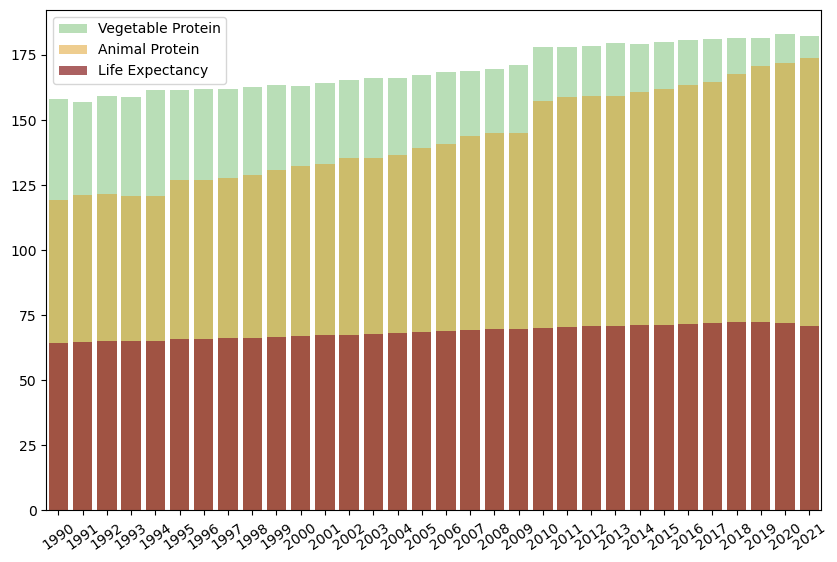

In [2352]:
plt.figure(figsize=(10, 6.5)) 
sns.barplot(data= correlating_food_type_and_life,x='year',y='daily_cal_veg_protein',color='g',alpha=0.5,label="Vegetable Protein")
sns.barplot(data= correlating_food_type_and_life,x='year',y='daily_cal_animal_protein',color='orange',alpha=0.5,label="Animal Protein")
sns.barplot(data= correlating_food_type_and_life,x='year',y='life_exp',color='brown',label="Life Expectancy",alpha=0.8)

plt.xticks(rotation=35)
plt.xlabel('')
plt.ylabel('');

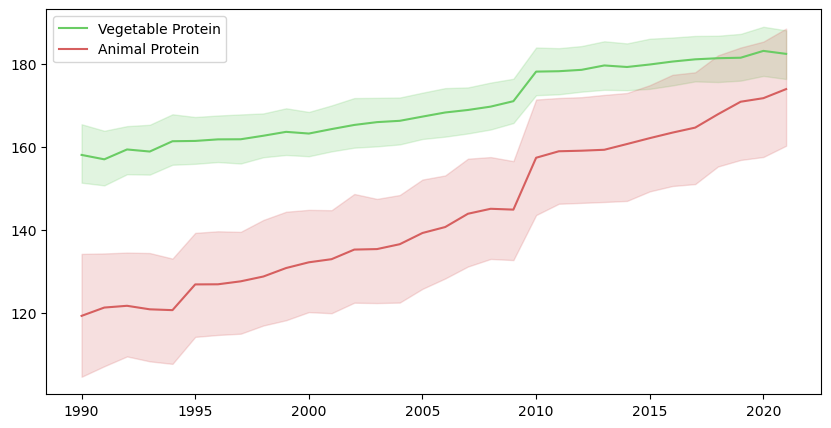

In [2330]:
sns.set_color_codes("muted")
plt.figure(figsize=(10, 5)) 
sns.lineplot(x=df.year ,y=df['daily_cal_veg_protein'],color='g',label="Vegetable Protein")
sns.lineplot(x=df.year, y=df['daily_cal_animal_protein'],color='r',label="Animal Protein")
plt.xlabel('')
plt.ylabel('');

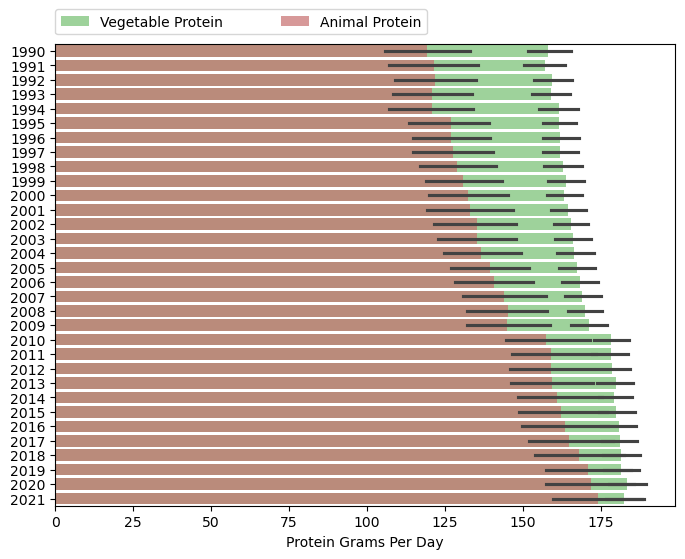

In [1944]:
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
sns.color_palette("Spectral", as_cmap=True)
sns.barplot(df,x='daily_cal_veg_protein',y='year',orient='h',alpha=0.7,color='g',label="Vegetable Protein")
sns.barplot(df,x='daily_cal_animal_protein',y='year',orient='h',alpha=0.7,color='r',label="Animal Protein")
plt.legend(bbox_to_anchor=(0, 1.02, .6, 0.102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Protein Grams Per Day')
plt.ylabel('');

# Do countries with a higher ratio vegetables protein consumption compared to animal protein exhibit higher life expectancies, and how does this relationship vary across different regions?   

# How does the variety of food consumed (measured by the number of different food categories with significant per capita consumption) correlate with life expectancy across different countries, and does this correlation differ between high-income and low-income countries?

#  Daily protein per capita in grams consumption over the years and life expectancy.

In [1552]:
life_time = df.groupby('year').agg({'life_exp':'mean'}).sort_values(by='life_exp') 
life_time = life_time.sort_values(by='year')

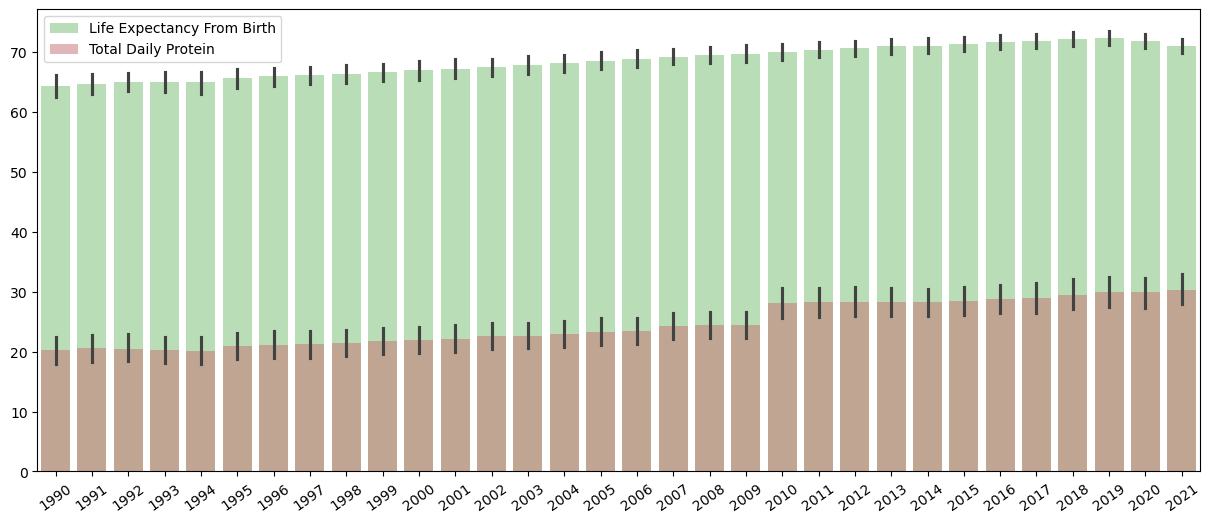

In [2297]:
sns.set_color_codes("muted")
plt.figure(figsize=(15, 6))
sns.barplot(df,x='year',y='life_exp',color='g',alpha=0.5,label= "Life Expectancy From Birth")
sns.barplot(df,x='year',y='total_daily_protein',color='r',alpha=0.5,label="Total Daily Protein")


plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 35);

  # total calories derived from veg vs animal protein 

# #4.) top 3 countries who derive protein mainly from animal sources.

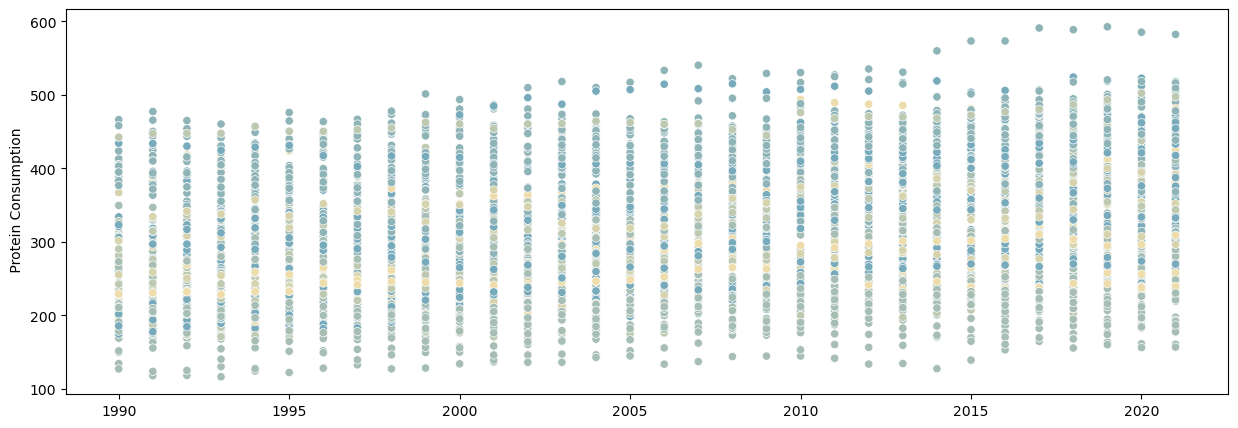

In [2332]:
animal_protein = df.groupby(['region','year']).agg({
    'cals_from_protein':'sum'}).sort_values(by='cals_from_protein',ascending = False).reset_index()
plt.figure(figsize=(15, 5)) 
sns.scatterplot(df,x = 'year',y='cals_from_protein',legend=False,hue='region')

plt.xlabel('')

plt.ylabel(' Protein Consumption');


In [1479]:
animal_heavy_list = animal_protein.entity.to_list()
animal_protein

,entity,daily_cal_animal_protein
0,hong kong,10379.29075
1,iceland,10288.08151
2,france,9854.82187


In [1481]:
top_animal_protein = df.loc[df['entity'].isin(animal_heavy_list)]
top_animal_protein.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,...,life_exp,gdp_per_capita,population,daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs,total_daily_protein,all_cause_per_100k,cals_from_protein
4312,france,fra,1990,6.842129,8.393952,8.756716,13.130036,1.551823,3.043186,4.595009,...,76.8351,33843.020,56990239.0,310.04218,156.43184,1459.6710,1606.7721,46.312851,463.794589,466.47402
4313,france,fra,1991,6.773715,8.729222,8.799782,13.708710,1.532150,3.023980,4.606530,...,77.0162,33898.234,57271563.0,321.38858,155.99704,1483.1715,1608.7472,47.174089,457.336897,477.38562
4314,france,fra,1992,6.745878,8.772666,9.105422,12.029645,1.522612,2.994807,4.608170,...,77.2973,34269.285,57554865.0,312.34726,152.82588,1494.1362,1619.2932,45.779200,448.643982,465.17314
4315,france,fra,1993,6.760627,8.465920,9.252978,10.514289,1.523664,2.966604,4.570991,...,77.3488,33906.223,57801260.0,302.23032,158.17850,1487.8124,1626.8387,44.055073,448.653082,460.40882
4316,france,fra,1994,6.806179,9.249941,9.280235,10.310251,1.504630,2.817395,4.756247,...,77.7681,34576.344,57999868.0,302.21860,152.84619,1486.0393,1605.3798,44.724878,430.359979,455.06479


###  countries who derive protein from mainly veg.

In [2326]:
veg_pro = df.groupby(['entity','year']).agg({
    'daily_cal_veg_protein':'sum'}).sort_values(by='daily_cal_veg_protein',ascending = False).reset_index()


veg_pro

,entity,year,daily_cal_veg_protein
0,turkey,1990,328.358400
1,turkey,1991,328.307620
2,turkey,1992,323.695430
3,turkey,1994,320.995270
4,turkey,1995,320.390600
...,...,...,...
5044,mongolia,1992,83.077560
5045,angola,1990,80.305176
5046,angola,1993,79.579630
5047,angola,1992,79.400970


In [1683]:
veg_heavy_list = veg_pro.entity.to_list()

top_veg_protein = df.loc[df['entity'].isin(veg_heavy_list)].reset_index(drop=True)


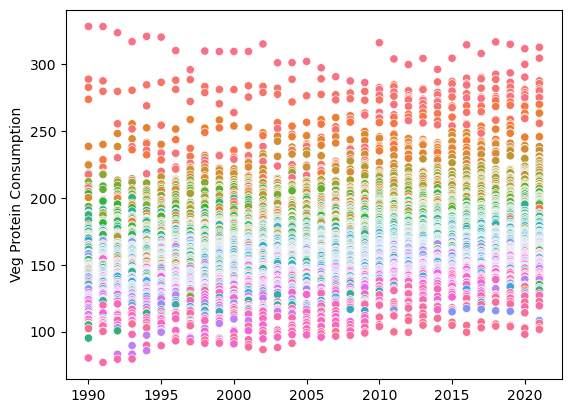

In [2328]:
sns.scatterplot(veg_pro,x = 'year',y='daily_cal_veg_protein',hue='entity',legend=False)
plt.xlabel('')
plt.ylabel('Veg Protein Consumption');

# #6.) how does life expectancy compare beteween top veg/animal protein? 

 ##### There is a strong positive correlation of 0.78 between calories derived from animal protein and a weak positive
 ##### correlation of 0.022 between calories derived from veg protein.

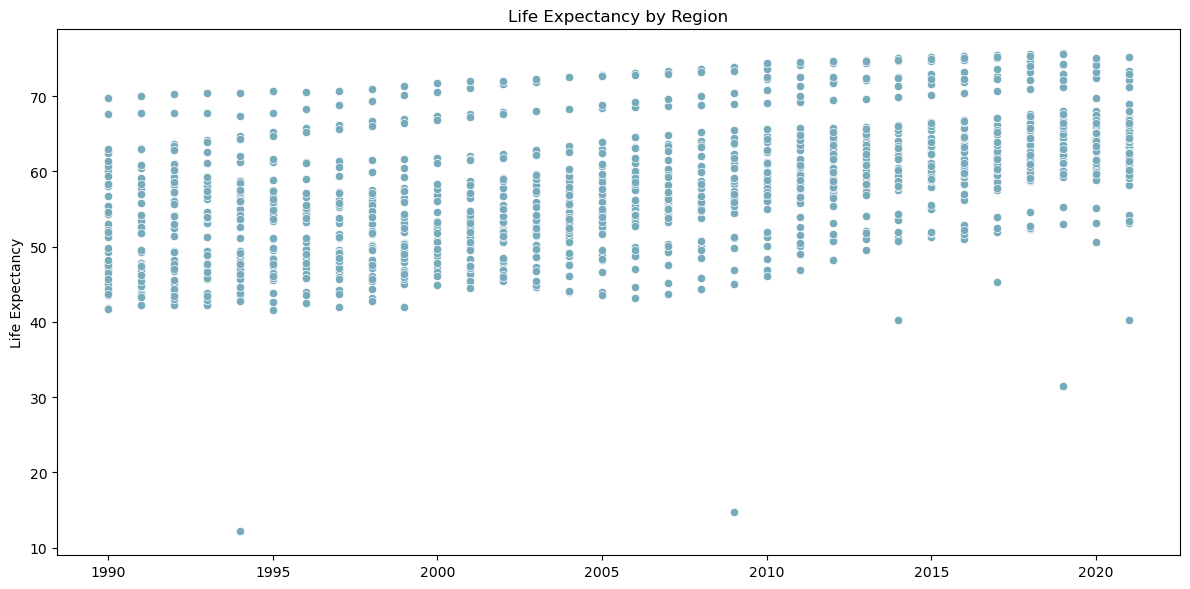

In [2161]:
Africa = df.loc[df['region']=='Africa']
#  Create the Plot
plt.figure(figsize=(12, 6))  
sns.scatterplot(data= Africa , x='year', y='life_exp',legend=False)  
plt.xlabel('')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Region')
plt.tight_layout()
plt.show()

# #7.)how does life expectancy compare beteween countries that derive calories from protein vs carbs and fat?  

In [2002]:
 # sorted carbohydrate group 

carb_heavy = df.groupby(['region']).agg({
                                            'daily_cal_carbs':'max',
                                            'life_exp':'max',
                                            'gdp_per_capita':'mean'  
                                            }).sort_values(by='daily_cal_carbs',ascending = False).reset_index()

carb_heavy['most_calorie_source'] = "High Carb Diet"
carb_heavy

,region,daily_cal_carbs,life_exp,gdp_per_capita,most_calorie_source
0,Asia,2477.6170,84.6703,13489.270163,High Carb Diet
1,Africa,2388.9197,75.6818,4584.495931,High Carb Diet
2,South America,2163.1682,80.6096,12747.066991,High Carb Diet
3,Europe,2160.9016,83.7804,32903.992679,High Carb Diet
4,North America,2088.8310,82.2848,16558.599446,High Carb Diet
5,Oceania,1797.9851,83.6639,13650.283915,High Carb Diet


In [1976]:
#fat group

fat_cals = df.groupby(['region']).agg({
    'daily_cal_fat':'max',
    'life_exp':'max',
    'gdp_per_capita':'mean'
    }).sort_values(by='daily_cal_fat',ascending = False).reset_index()

fat_cals['most_calorie_source']= "High Fat Diets"
fat_cals

,region,daily_cal_fat,life_exp,gdp_per_capita,most_calorie_source
0,Europe,1660.5905,83.7804,32903.992679,High Fat Diets
1,North America,1604.7001,82.2848,16558.599446,High Fat Diets
2,Asia,1468.7107,84.6703,13489.270163,High Fat Diets
3,Oceania,1465.7396,83.6639,13650.283915,High Fat Diets
4,South America,1255.7699,80.6096,12747.066991,High Fat Diets
5,Africa,1030.0499,75.6818,4584.495931,High Fat Diets


In [2096]:
#protein group

top_three_protein_cals = df.groupby('region').agg({'cals_from_protein':'max','life_exp':'max','gdp_per_capita':'mean'}).sort_values(by='cals_from_protein',ascending = False)

top_three_protein_cals = top_three_protein_cals.reset_index()
top_three_protein_cals['most_calorie_source']= "High Protein Diets"
high_protein_diets = top_three_protein_cals

<Axes: xlabel='life_exp', ylabel='gdp_per_capita'>

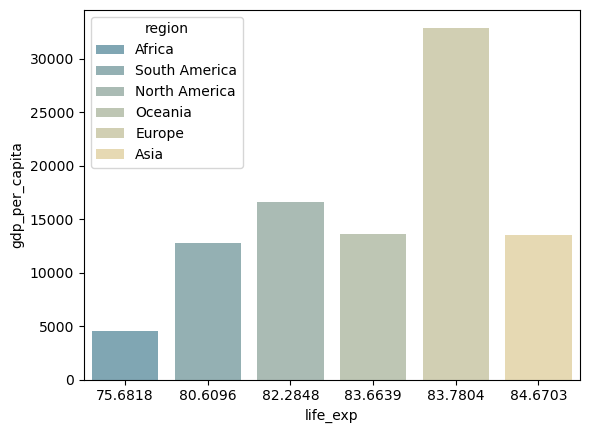

In [2118]:
#concat 

seven1 = pd.concat([carb_heavy,fat_cals])

seven_concat = pd.concat([seven1,high_protein_diets])

seven_life = seven_concat.sort_values(by='life_exp',ascending = False)
seven_gdp  = seven_concat.sort_values(by='gdp_per_capita',ascending = False)

sns.barplot(seven_concat.sort_values(by='life_exp',ascending=False) ,x='life_exp',y='gdp_per_capita',hue='region')

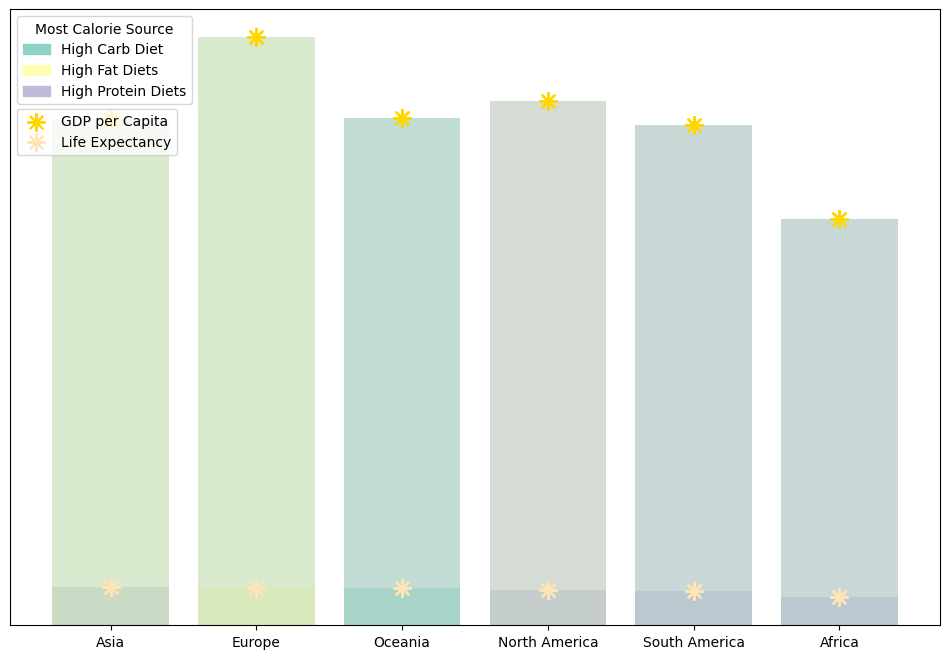

In [2078]:
plt.figure(figsize=(12, 8))

# Assuming 'seven_life' and 'seven_gdp' are your DataFrames

#  Create a color mapping dictionary
unique_categories = seven_concat['most_calorie_source'].unique() 
color_map = {category: plt.cm.Set3(i) for i, category in enumerate(unique_categories)}

#  Plot life expectancy with color mapping
for i, row in seven_life.iterrows():
    plt.bar(row['region'], row['life_exp'], color=color_map[row['most_calorie_source']], alpha=1)


# Plot GDP per capita with color mapping (assuming 'most_calorie_source' exists in 'seven_gdp' too)
for i, row in seven_gdp.iterrows():
    plt.bar(row['region'], row['gdp_per_capita'], color=color_map[row['most_calorie_source']], alpha=0.4)
plt.scatter(seven_gdp['region'],seven_gdp['gdp_per_capita'], color='gold', marker=(8, 2, 0), s=150, label='GDP per Capita')
plt.scatter(seven_life['region'], seven_life['life_exp'], color='moccasin', marker=(8, 2, 0), s=150, label='Life Expectancy')
legend1 = plt.legend(bbox_to_anchor=(0.187, 0.85), loc='upper right')  # Legend for scatter plots

plt.yscale('log')
plt.ylabel('')
plt.xlabel('')

# Add the legend
plt.gca().add_artist(legend1) 
plt.legend()

# (Optional) Add a color legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[category]) for category in unique_categories]
plt.legend(handles, unique_categories, title='Most Calorie Source', loc='upper left') 
plt.yscale('log')
plt.gca().get_yaxis().set_visible(False) 
plt.show()

In [1956]:
# while there is a correlation betweeen life expectancy and the type of foods you eat, this graph clearly shows the stronger correlation to gdp and what you eat.

# who in our world, on average, lives the longest/shortest and what are they eating? 

In [2375]:
avg_life_exp = df.groupby(['entity']) \
                                   .agg({'life_exp': 'mean'}) \
                                   .reset_index() 

avg_life_exp = avg_life_exp.sort_values(by='life_exp',ascending = False).reset_index(drop=True)

top_3_life_exp = avg_life_exp
bottom_life_exp = avg_life_exp

In [2373]:
long_life_list = top_3_life_exp .entity.to_list()
long_life_list

['hong kong',
 'japan',
 'macao',
 'south korea',
 'switzerland',
 'australia',
 'spain',
 'italy',
 'norway',
 'malta',
 'sweden',
 'qatar',
 'israel',
 'iceland',
 'france',
 'new zealand',
 'united arab emirates',
 'ireland',
 'canada',
 'netherlands',
 'portugal',
 'austria',
 'finland',
 'luxembourg',
 'belgium',
 'cyprus',
 'denmark',
 'greece',
 'united kingdom',
 'germany',
 'slovenia',
 'chile',
 'bahrain',
 'costa rica',
 'kuwait',
 'oman',
 'maldives',
 'albania',
 'bermuda',
 'czechia',
 'united states',
 'estonia',
 'panama',
 'uruguay',
 'lebanon',
 'croatia',
 'china',
 'bosnia and herzegovina',
 'poland',
 'turkey',
 'slovakia',
 'thailand',
 'ecuador',
 'antigua and barbuda',
 'sri lanka',
 'montenegro',
 'north macedonia',
 'jordan',
 'iran',
 'argentina',
 'colombia',
 'barbados',
 'hungary',
 'lithuania',
 'peru',
 'serbia',
 'malaysia',
 'brazil',
 'algeria',
 'latvia',
 'tunisia',
 'cape verde',
 'vietnam',
 'romania',
 'armenia',
 'bulgaria',
 'grenada',
 'maurit

In [1525]:
long_life = final.loc[final['entity'].isin(long_life_list)]


In [1527]:
long_life = long_life.groupby('entity').agg({'life_exp':'mean','total_daily_protein':'mean','daily_cal_animal_protein':'mean','daily_cal_veg_protein':'mean','gdp_per_capita':'mean','year':'count'}).reset_index().round(2)

In [1529]:
short_list = df.groupby(['entity']) \
                                   .agg({'life_exp': 'max'}) \
                                   .sort_values(by='life_exp', ascending=True) \
                                   .head(3) \
                                   .reset_index() 

short_list = short_list.entity.to_list()

In [1531]:
shorter_life = df.loc[df['entity'].isin(short_list)]

In [1533]:
shortest_life = shorter_life.groupby('entity').agg({'life_exp':'mean','total_daily_protein':'mean','daily_cal_animal_protein':'mean','daily_cal_veg_protein':'mean','gdp_per_capita':'mean','year':'count'}).reset_index().round(2)

# protein and gdp

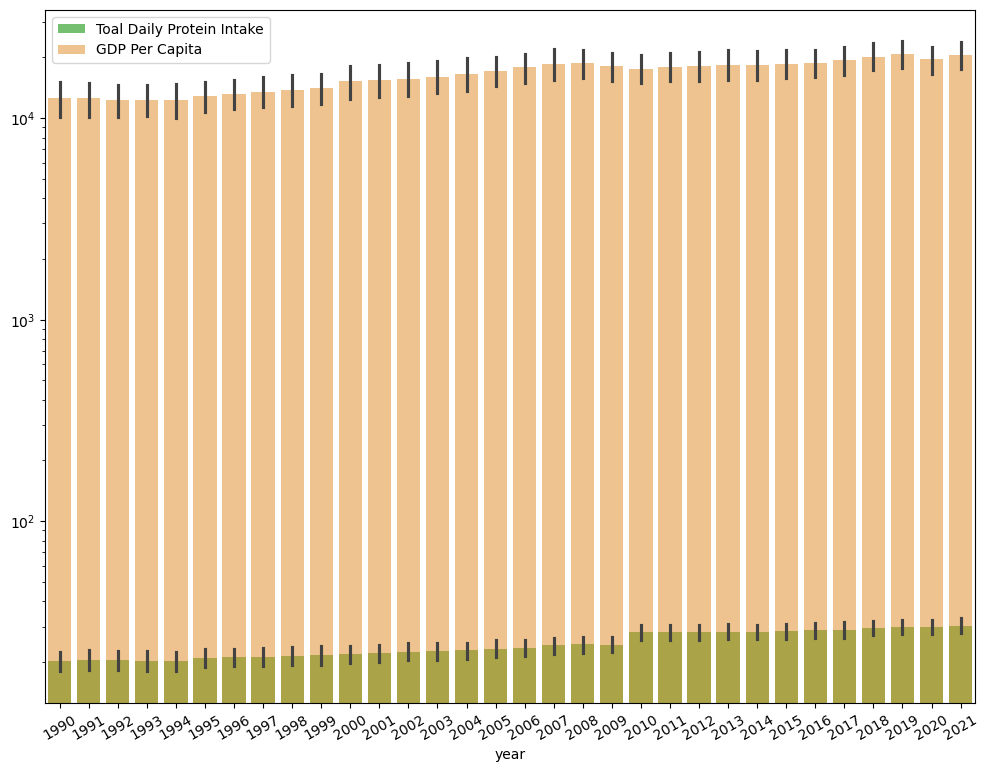

In [2377]:
plt.figure(figsize=(12, 9
                   ))
sns.barplot(df,x='year',y='total_daily_protein',color='g',label='Toal Daily Protein Intake')
sns.barplot(df,x='year',y='gdp_per_capita',color='darkorange',alpha=0.5,label='GDP Per Capita')
plt.yscale('log')
plt.ylabel('')
plt.xticks(rotation= 30)
plt.legend(loc='upper left');

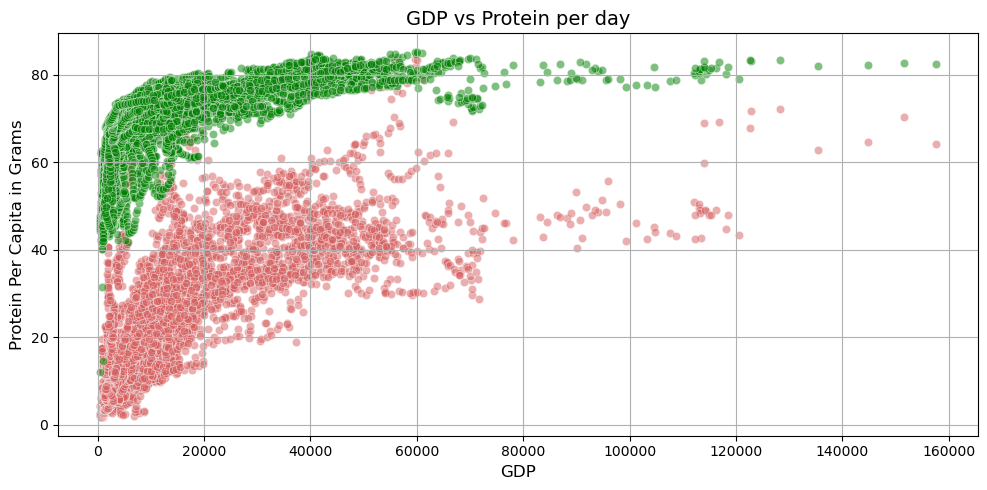

In [2379]:
plt.figure(figsize=(10, 5)) 


sns.scatterplot(data= df,x=df['gdp_per_capita'], y=df['total_daily_protein'],color='r',alpha=0.5)
sns.scatterplot(data= df,x=df['gdp_per_capita'], y=df['life_exp'],color='green',alpha=0.5)


sns.color_palette("flare", as_cmap=True)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Protein Per Capita in Grams', fontsize=12)
plt.title('GDP vs Protein per day', fontsize=14)



plt.grid(True) 
plt.tight_layout() 
plt.show();

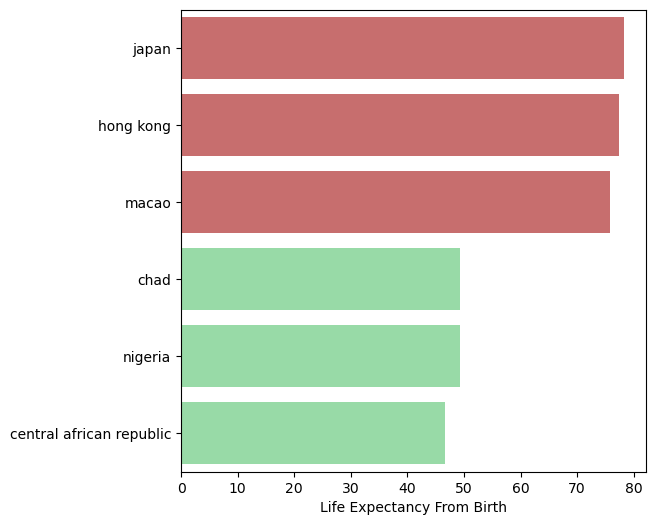

In [2381]:
sns.set_color_codes("muted")
plt.figure(figsize=(6, 6))
sns.barplot(data=long_life.sort_values(by='life_exp',ascending=False),x='life_exp',y='entity',orient="h",color='r')

sns.set_color_codes("pastel")
sns.barplot(data=shortest_life.sort_values(by='life_exp',ascending=False),x='life_exp',y='entity',orient="h",color='g')
plt.xlabel('Life Expectancy From Birth')
plt.ylabel('');

#  top 3 countires that have eaten the MOST protein rich diets from 1990-2021?

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_26841/3282351622.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:g'` for the same effect.

  sns.barplot(top_three_most_protein,x = 'entity',y='total_daily_protein',hue='entity',color='g')


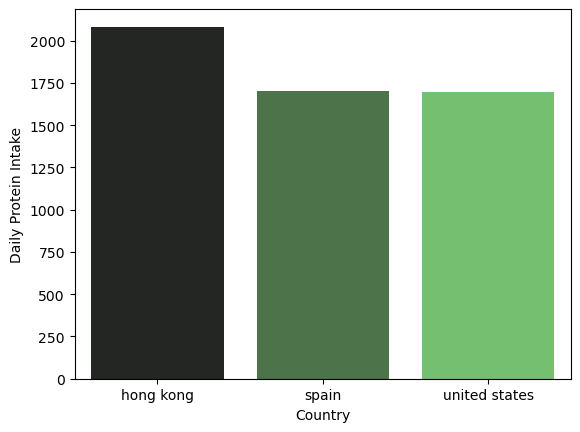

In [1828]:
top_three_most_protein = df.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum','life_exp':'max','gdp_per_capita': 'mean'}) \
                                   .sort_values(by='total_daily_protein', ascending=False) \
                                   .head(3)\
                                   .reset_index() 

top_three_most_protein = top_three_most_protein.sort_values(by='life_exp',ascending=False)
   
sns.set_color_codes("muted")
sns.barplot(top_three_most_protein,x = 'entity',y='total_daily_protein',hue='entity',color='g')
plt.xlabel('Country')
plt.ylabel('Daily Protein Intake');



###  what countries have eaten the LEAST grams per day of protein rich diets over these years?

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_26841/3098632444.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:g'` for the same effect.

  sns.barplot(bottom_three_least_protein,x = 'entity',y='total_daily_protein',hue='entity',color='g')


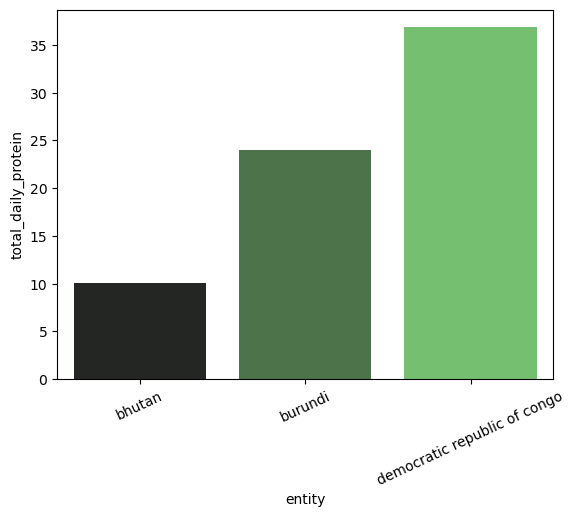

In [1830]:
bottom_three_least_protein = df.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum','life_exp':'max','gdp_per_capita': 'mean'}) \
                                   .sort_values(by='total_daily_protein', ascending=True) \
                                   .head(3) \
                                   .reset_index()                      

   
sns.barplot(bottom_three_least_protein,x = 'entity',y='total_daily_protein',hue='entity',color='g')
plt.xticks(rotation = 25);

In [1472]:
bottom_three_least_protein.sort_values(by='life_exp',ascending = False)

,entity,total_daily_protein,life_exp,gdp_per_capita
0,bhutan,10.039871,72.4482,11595.684000
1,burundi,23.979995,62.5694,772.873190
2,democratic republic of congo,36.849998,60.4283,988.326127


In [1474]:
top_and_bottom_total_daily_protein = pd.concat([top_three_most_protein,bottom_three_least_protein])


# what is the most popular protein source in the world?

In [1558]:
protein_sources_sum = df.iloc[:,3:11].sum().round().to_frame().reset_index()

In [1560]:
ranking_proteins = protein_sources_sum.rename(columns={protein_sources_sum.columns[0]:'protein_type',
                                                       protein_sources_sum.columns[1]:'sum_of_consumption'})

In [1562]:
ranking_proteins['rank'] = ranking_proteins['sum_of_consumption'].rank(ascending=False)

In [1564]:
ranking_proteins = ranking_proteins.sort_values(by='rank',ascending= True).reset_index(drop=True)

In [1566]:
ranking_proteins.columns

Index(['protein_type', 'sum_of_consumption', 'rank'], dtype='object')

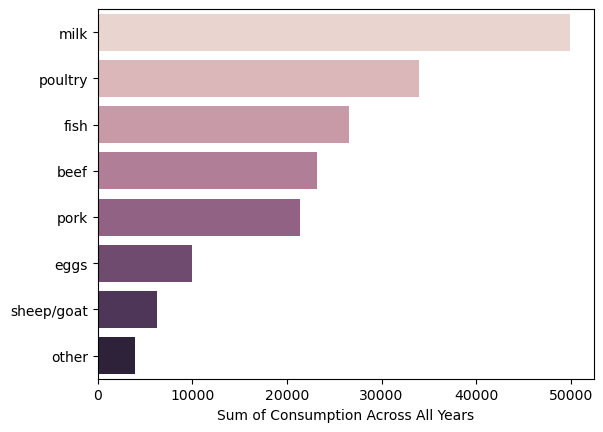

In [1568]:
sns.barplot(ranking_proteins,x='sum_of_consumption',y='protein_type',orient='h',hue='rank',legend=False)
plt.xlabel('Sum of Consumption Across All Years')
plt.ylabel('');